In [1]:
from sklearn.model_selection import StratifiedKFold
!pip install -r requirements.txt


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    f1_score,
    precision_score,
    recall_score,
    accuracy_score
)
from sklearn.model_selection import (StratifiedKFold, cross_validate)
warnings.filterwarnings('ignore')

In [3]:
X_train = np.load('artifacts/X_train.npz')['X_train']
X_test = np.load('artifacts/X_test.npz')['X_train']
Y_train = np.load('artifacts/Y_train.npz')['X_train']
Y_test = np.load('artifacts/Y_test.npz')['X_train']

In [4]:
cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)

In [5]:
model_lr = LogisticRegression(
    random_state=42,
    max_iter = 1000,
)

In [6]:
cv_results = cross_validate(model_lr, X_train, Y_train, cv=cv,  scoring='f1' ,return_train_score=False)

In [7]:
cv_results

{'fit_time': array([0.00911069, 0.00665736, 0.0070684 , 0.00606537, 0.00763369,
        0.00605249]),
 'score_time': array([0.00102019, 0.00150371, 0.00203824, 0.00251746, 0.00150466,
        0.00201797]),
 'test_score': array([0.73789174, 0.71247059, 0.73377234, 0.74063537, 0.72795851,
        0.7381733 ])}

In [8]:
score_array = ['accuracy', 'precision', 'recall', 'f1']
for score in score_array:
    cv_results = cross_validate(model_lr, X_train, Y_train, cv=cv,  scoring=score ,return_train_score=False)

    test_score = cv_results['test_score']
    test_score_avg = np.mean(test_score)
    print(f"{score} : {test_score_avg:.4f}")

accuracy : 0.7307
precision : 0.7288
recall : 0.7349
f1 : 0.7318


In [9]:
test_f1_score = np.argmax(cv_results['test_score'])
test_f1_score

np.int64(3)

In [10]:
fold_indices = list(cv.split(X_train, Y_train))
fold_indices

[(array([    0,     1,     2, ..., 12665, 12666, 12667], shape=(10556,)),
  array([    5,    15,    23, ..., 12655, 12658, 12663], shape=(2112,))),
 (array([    2,     3,     5, ..., 12664, 12665, 12667], shape=(10556,)),
  array([    0,     1,     4, ..., 12651, 12661, 12666], shape=(2112,))),
 (array([    0,     1,     3, ..., 12665, 12666, 12667], shape=(10557,)),
  array([    2,    10,    18, ..., 12653, 12659, 12664], shape=(2111,))),
 (array([    0,     1,     2, ..., 12664, 12666, 12667], shape=(10557,)),
  array([   11,    13,    22, ..., 12646, 12656, 12665], shape=(2111,))),
 (array([    0,     1,     2, ..., 12665, 12666, 12667], shape=(10557,)),
  array([    6,     7,     8, ..., 12648, 12657, 12660], shape=(2111,))),
 (array([    0,     1,     2, ..., 12664, 12665, 12666], shape=(10557,)),
  array([    3,    16,    24, ..., 12654, 12662, 12667], shape=(2111,)))]

In [12]:
best_training_idx, best_test_idx = fold_indices[test_f1_score]
best_training_idx, best_test_idx

(array([    0,     1,     2, ..., 12664, 12666, 12667], shape=(10557,)),
 array([   11,    13,    22, ..., 12646, 12656, 12665], shape=(2111,)))

In [17]:
X_train_best = X_train[best_training_idx]
Y_train_best = Y_train[best_training_idx]
X_test_best = Y_train[best_test_idx]
Y_test_best = Y_train[best_test_idx]

In [18]:
model_lr = LogisticRegression(
    random_state=42,
    max_iter = 1000,
)

model_lr.fit(X_train_best, Y_train_best)

LogisticRegression(max_iter=1000, random_state=42)

In [19]:
Y_hat_train = model_lr.predict(X_train)
Y_hat_test = model_lr.predict(X_test)

Y_proba_train = model_lr.predict_proba(X_train)
Y_proba_test = model_lr.predict_proba(X_test)

In [20]:
accuracy = accuracy_score(Y_test, Y_hat_test)
precision = precision_score(Y_test, Y_hat_test)
recall = recall_score(Y_test, Y_hat_test)
f1 = f1_score(Y_test, Y_hat_test)

In [21]:
print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1 Score: ', f1)

Accuracy:  0.6948474237118559
Precision:  0.3392857142857143
Recall:  0.6569148936170213
F1 Score:  0.447463768115942


Text(50.722222222222214, 0.5, 'Actual')

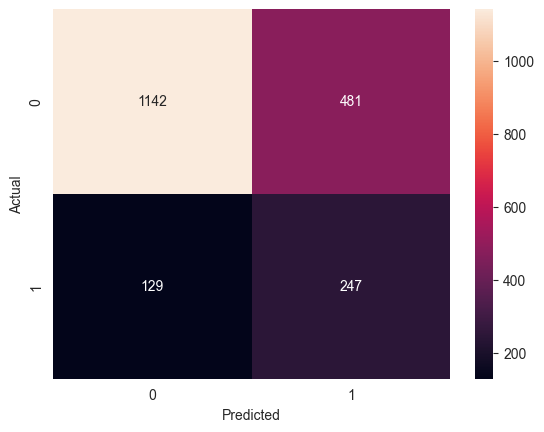

In [23]:
cm = confusion_matrix(Y_test, Y_hat_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')